### Import the libraries we'll use

In [2]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')

### Import speed-dating dataset and produce some summary statistics
[OpenML Speed Dating](https://www.openml.org/search?type=data&sort=runs&id=40536&status=active)

In [3]:
df = pd.read_csv('../datasets/speeddating.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), object(64)
memory usage: 7.9+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wave,8378.0,11.350919,5.995903,1.00,7.00,11.00,15.00,21.00
age,8283.0,26.358928,3.566763,18.00,24.00,26.00,28.00,55.00
age_o,8274.0,26.364999,3.563648,18.00,24.00,26.00,28.00,55.00
d_age,8378.0,4.185605,4.596171,0.00,1.00,3.00,5.00,37.00
importance_same_race,8299.0,3.784793,2.845708,0.00,1.00,3.00,6.00,10.00
importance_same_religion,8299.0,3.651645,2.805237,1.00,1.00,3.00,6.00,10.00
pref_o_attractive,8289.0,22.495347,12.569802,0.00,15.00,20.00,25.00,100.00
pref_o_sincere,8289.0,17.396867,7.044003,0.00,15.00,18.37,20.00,60.00
pref_o_intelligence,8289.0,20.270759,6.782895,0.00,17.39,20.00,23.81,50.00
pref_o_funny,8280.0,17.459714,6.085526,0.00,15.00,18.00,20.00,50.00


In [4]:
print(df.shape)

(8378, 123)


In [5]:
df.isna().sum()[df.isna().sum() != 0]
#meaningful nulls in shared_interest_o and shared_interest_partner; expected_num vars also have meaningful nulls

age                                95
age_o                             104
importance_same_race               79
importance_same_religion           79
pref_o_attractive                  89
pref_o_sincere                     89
pref_o_intelligence                89
pref_o_funny                       98
pref_o_ambitious                  107
pref_o_shared_interests           129
attractive_o                      212
sinsere_o                         287
intelligence_o                    306
funny_o                           360
ambitous_o                        722
shared_interests_o               1076
attractive_important               79
sincere_important                  79
intellicence_important             79
funny_important                    89
ambtition_important                99
shared_interests_important        121
attractive                        105
sincere                           105
intelligence                      105
funny                             105
ambition    

In [8]:
#Target Variable is not balanced ~ weighted tb
df['match'].value_counts() / df.shape[0]

b'0'    0.835283
b'1'    0.164717
Name: match, dtype: float64

In [10]:
df['income']

KeyError: 'income'

#### Produce initial visualizations

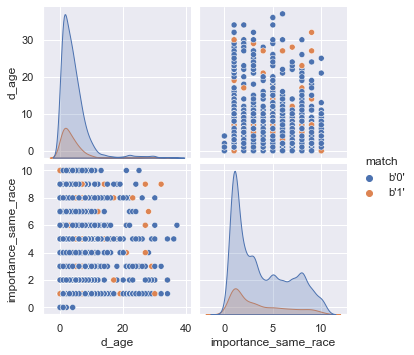

In [23]:
sns.pairplot(df[['d_age', 'importance_same_race', 'match']], hue="match")
plt.show()